# Tests

### Imports and data loading

In [1]:
import definitions as d
import neural_network as nn
import numpy as np
import time
import matplotlib.pyplot as plt

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
import tensorflow as tf

from IPython.display import display
from test_case_creator import (
    denormalized,
    get_sets__without_neighbors__one_prediction__without_aggregation,
    get_sets__without_neighbors__24_predictions__without_aggregation,
    get_sets__with_3_neighbors__one_prediction__without_aggregation,
    get_sets__without_neighbors__one_prediction__with_aggregation
)

In [2]:
(train_set1, test_set1, params1) = get_sets__without_neighbors__one_prediction__without_aggregation()
(train_set2, test_set2, params2) = get_sets__with_3_neighbors__one_prediction__without_aggregation()
(train_set3, test_set3, params3) = get_sets__without_neighbors__24_predictions__without_aggregation()
(train_set4, test_set4, params4) = get_sets__without_neighbors__one_prediction__with_aggregation()

## H1 - addition of 3 closest cities will increase accuracy with similar convergence, but with longer compute time

### Networks

In [3]:
def get_h1_net_1(is_regression):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 400, d.relu, rng, 0.8)
    output = nn.FullConnectLayer(output, 250, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 80, d.relu, rng, 0.6)

    if is_regression:
        output = nn.FullConnectLayer(output, 1, d.linear, rng, 1)
        return nn.NeuralNetwork(output, d.l2_loss, rng)
    else:
        output = nn.FullConnectLayer(output, 2, d.sigmoid, rng, 1)
        output = nn.FullConnectLayer(output, 2, d.softmax, rng, 1)
        return nn.NeuralNetwork(output, d.hinge_loss, rng)


def get_h1_net_2(is_regression):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 300, d.relu, rng, 0.8)
    output = nn.FullConnectLayer(output, 300, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 200, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 160, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 80, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 40, d.relu, rng, 0.6)

    if is_regression:
        output = nn.FullConnectLayer(output, 1, d.linear, rng, 1)
        return nn.NeuralNetwork(output, d.l2_loss, rng)
    else:
        output = nn.FullConnectLayer(output, 2, d.sigmoid, rng, 1)
        output = nn.FullConnectLayer(output, 2, d.softmax, rng, 1)
        return nn.NeuralNetwork(output, d.hinge_loss, rng)


def get_h1_net_3(is_regression):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])

    d1_n1 = nn.InputLayer(120, "d1_n1")
    d2_n1 = nn.InputLayer(120, "d2_n1")
    d3_n1 = nn.InputLayer(120, "d3_n1")
    days_n1 = nn.MergeLayer([d1_n1, d2_n1, d3_n1])

    d1_n2 = nn.InputLayer(120, "d1_n2")
    d2_n2 = nn.InputLayer(120, "d2_n2")
    d3_n2 = nn.InputLayer(120, "d3_n2")
    days_n2 = nn.MergeLayer([d1_n2, d2_n2, d3_n2])

    d1_n3 = nn.InputLayer(120, "d1_n3")
    d2_n3 = nn.InputLayer(120, "d2_n3")
    d3_n3 = nn.InputLayer(120, "d3_n3")
    days_n3 = nn.MergeLayer([d1_n3, d2_n3, d3_n3])

    days = nn.MergeLayer([days, days_n1, days_n2, days_n3])

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 300, d.relu, rng, 0.8)
    output = nn.FullConnectLayer(output, 300, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 200, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 160, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 80, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 40, d.relu, rng, 0.6)
    
    if is_regression:
        output = nn.FullConnectLayer(output, 1, d.linear, rng, 1)
        return nn.NeuralNetwork(output, d.l2_loss, rng)
    else:
        output = nn.FullConnectLayer(output, 2, d.sigmoid, rng, 1)
        output = nn.FullConnectLayer(output, 2, d.softmax, rng, 1)
        return nn.NeuralNetwork(output, d.hinge_loss, rng)


def get_h1_net_4(is_regression):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])

    d1_n1 = nn.InputLayer(120, "d1_n1")
    d2_n1 = nn.InputLayer(120, "d2_n1")
    d3_n1 = nn.InputLayer(120, "d3_n1")
    days_n1 = nn.MergeLayer([d1_n1, d2_n1, d3_n1])

    d1_n2 = nn.InputLayer(120, "d1_n2")
    d2_n2 = nn.InputLayer(120, "d2_n2")
    d3_n2 = nn.InputLayer(120, "d3_n2")
    days_n2 = nn.MergeLayer([d1_n2, d2_n2, d3_n2])

    d1_n3 = nn.InputLayer(120, "d1_n3")
    d2_n3 = nn.InputLayer(120, "d2_n3")
    d3_n3 = nn.InputLayer(120, "d3_n3")
    days_n3 = nn.MergeLayer([d1_n3, d2_n3, d3_n3])

    days = nn.MergeLayer([days, days_n1, days_n2, days_n3])

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 1500, d.relu, rng, 0.8)
    output = nn.FullConnectLayer(output, 1000, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 600, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 200, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 100, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 50, d.relu, rng, 0.6)

    if is_regression:
        output = nn.FullConnectLayer(output, 1, d.linear, rng, 1)
        return nn.NeuralNetwork(output, d.l2_loss, rng)
    else:
        output = nn.FullConnectLayer(output, 2, d.sigmoid, rng, 1)
        output = nn.FullConnectLayer(output, 2, d.softmax, rng, 1)
        return nn.NeuralNetwork(output, d.hinge_loss, rng)


### Tests

#### Results

Regression without neighbors:
1. 4 epochs, 33.42% / 8.11%, 12.62 s
2. 41 epochs, 45.92% / 8.54%, 187.69 s

Regression with neighbors:
1. 5 epochs, 14.95% / 10.48%, 40.98 s
2. 4 epochs, 48.76% / 6.02%, 64.36 s

Classification without neighbors:
1. 10 epochs, 75.52% / 60.77 %, 0.5 / 0.5, 44.42 s
2. 11 epochs, 75.52% / 60.77 %, 0.5 / 0.5, 66.58 s

Classification with neighbors:
1. 12 epochs, 76.12% / 60.82 %, 0.5 / 0.5, 77.07 s (not better, just less cases after nan filtering)
2. 15 epochs, 76.12% / 60.82 %, 0.5 / 0.5, 267.18 s (not better, just less cases after nan filtering)

In [4]:
def test(function, output, train_set, test_set, params, figname):
    print("================================== new test ==================================")
    net = function(output == "output_temp")

    start = time.time()
    (train_losses, test_losses) = net.train(train_set, test_set, 1024, output)
    end = time.time()

    print(f"Time elapsed: {end - start : .2f} s")

    if output == "output_temp":
        predicted = denormalized(net.predict(train_set), params["temperature"])
        expected = denormalized(train_set[output], params["temperature"])
        diffs = np.abs(predicted - expected)
        print(f"[train] min: {np.min(diffs)}, max: {np.max(diffs)}, mean: {np.mean(diffs)}, median: {np.median(diffs)}")
        print(f"[train] Good predictions: {np.count_nonzero(diffs <= 2)}, bad predictions: {np.count_nonzero(diffs > 2)}, success rate: {np.count_nonzero(diffs <= 2) / diffs.size * 100 : .2f}%")

        predicted = denormalized(net.predict(test_set), params["temperature"])
        expected = denormalized(test_set[output], params["temperature"])
        diffs = np.abs(predicted - expected)
        print(f"[test] min: {np.min(diffs)}, max: {np.max(diffs)}, mean: {np.mean(diffs)}, median: {np.median(diffs)}")
        print(f"[test] Good predictions: {np.count_nonzero(diffs <= 2)}, bad predictions: {np.count_nonzero(diffs > 2)}, success rate: {np.count_nonzero(diffs <= 2) / diffs.size * 100 : .2f}%")
    else:
        predicted = net.predict(train_set)[0, :]
        expected = train_set["output_wind"][0, :]
        auc = tf.keras.metrics.AUC()
        auc.update_state(expected, predicted)
        predicted = np.rint(predicted)
        print(f"[train] Good predictions: {np.count_nonzero(predicted == expected)}, bad predictions: {np.count_nonzero(predicted != expected)}, success_rate: {np.count_nonzero(predicted == expected) / predicted.size * 100 : .2f}%")
        print(f"[train] AUC: {auc.result().numpy()}")

        predicted = net.predict(test_set)[0, :]
        expected = test_set["output_wind"][0, :]
        auc = tf.keras.metrics.AUC()
        auc.update_state(expected, predicted)
        predicted = np.rint(predicted)
        print(f"[test] Good predictions: {np.count_nonzero(predicted == expected)}, bad predictions: {np.count_nonzero(predicted != expected)}, success_rate: {np.count_nonzero(predicted == expected) / predicted.size * 100 : .2f}%")
        print(f"[test] AUC: {auc.result().numpy()}")

    fig = plt.figure()
    ax = fig.gca()
    ax.plot(range(1, len(train_losses) + 1), train_losses, "-o")
    ax.plot(range(1, len(test_losses) + 1), test_losses, "-o")
    ax.xaxis.set_label("epoch")
    ax.xaxis.get_major_locator().set_params(integer=True)
    ax.yaxis.set_label("loss")
    ax.set_yscale("log")
    ax.legend(["train", "test"])
    fig.savefig(os.path.join("plots", "h1", figname))

================================== new test ==================================
Epoch 1: 

/home/gregg/projects/sieci_neuronowe_3/definitions.py:30: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


train: 0.8647564167209004, test: 0.9040578141586798
Epoch 2: train: 0.7070608886746678, test: 0.8553112946099721
Epoch 3: train: 0.6189306787407555, test: 0.829189606338619
Epoch 4: train: 0.5691984956978171, test: 0.8150200230866524
Epoch 5: train: 0.5430940770118747, test: 0.8066092039335024
Epoch 6: train: 0.5274085875750242, test: 0.8012974416488472
Epoch 7: train: 0.5163970263218826, test: 0.7977037419317686
Epoch 8: train: 0.5078226119552212, test: 0.7951453547478011
Epoch 9: train: 0.5030866610835654, test: 0.7932528910061621
Epoch 10: train: 0.5019645483371817, test: 0.7918147123166829
Epoch 11: train: 0.49497089777062314, test: 0.7906899074580144
Epoch 12: train: 0.49564297043992056, test: 0.7897852045382577
Epoch 13: train: 0.49222412987416847, test: 0.7890545054619709
Epoch 14: train: 0.4910336639523888, test: 0.7884500270688662
Epoch 15: train: 0.48822807289899656, test: 0.7879442621847672
Time elapsed:  267.18 s
[train] Good predictions: 29758, bad predictions: 9348, succe

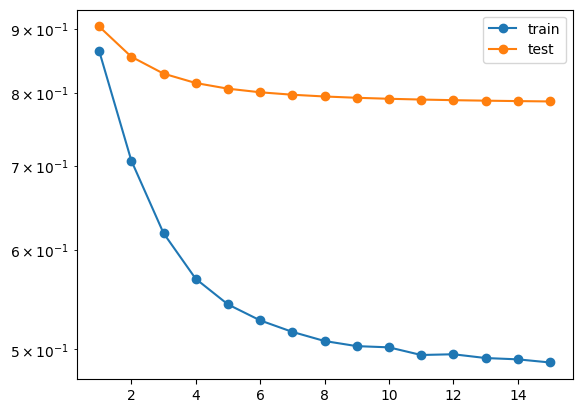

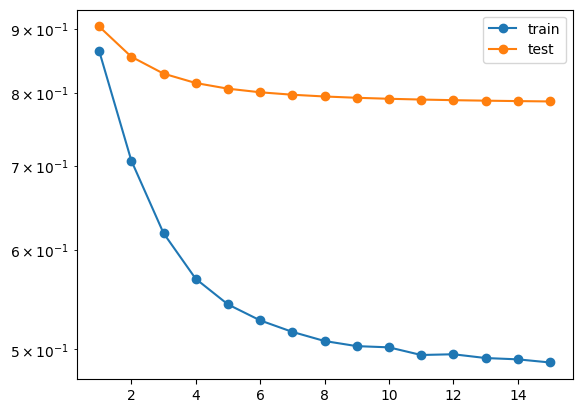

In [5]:
test(get_h1_net_1, "output_temp", train_set1, test_set1, params1, "n1_r_no_neighbors.png")
test(get_h1_net_2, "output_temp", train_set1, test_set1, params1, "n2_r_no_neighbors.png")
test(get_h1_net_3, "output_temp", train_set2, test_set2, params2, "n3_r_neighbors.png")
test(get_h1_net_4, "output_temp", train_set2, test_set2, params2, "n4_r_neighbors.png")

test(get_h1_net_1, "output_wind", train_set1, test_set1, params1, "n1_c_no_neighbors.png")
test(get_h1_net_2, "output_wind", train_set1, test_set1, params1, "n2_c_no_neighbors.png")
test(get_h1_net_3, "output_wind", train_set2, test_set2, params2, "n3_c_neighbors.png")
test(get_h1_net_4, "output_wind", train_set2, test_set2, params2, "n4_c_neighbors.png")

## H2 - mean from 24 predictions will be better for architectures with little number of weights, whereas 1 prediction will be better when many weights

### Networks

In [ ]:
def get_h2_net_1(output_size):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 200, d.relu, rng, 0.8)
    output = nn.FullConnectLayer(output, 50, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, output_size, d.linear, rng, 1)

    return nn.NeuralNetwork(output, d.l2_loss, rng)


def get_h2_net_2(output_size):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 300, d.relu, rng, 0.8)
    output = nn.FullConnectLayer(output, 300, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 200, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 160, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 80, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 40, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, output_size, d.linear, rng, 1)

    return nn.NeuralNetwork(output, d.l2_loss, rng)

### Tests

#### Results

1 prediction:
1. 
2. 

24 predictions:
1. 
2. 

In [ ]:
def test(function, output_size, train_set, test_set, params, figname):
    print("================================== new test ==================================")
    net = function(output_size)

    start = time.time()
    (train_losses, test_losses) = net.train(train_set, test_set, 1024, "output_temp")
    end = time.time()

    print(f"Time elapsed: {end - start : .2f} s")

    predicted = np.mean(denormalized(net.predict(train_set), params["temperature"]), axis=0)
    expected = np.mean(denormalized(train_set["output_temp"], params["temperature"]), axis=0)
    diffs = np.abs(predicted - expected)
    print(f"[train] min: {np.min(diffs)}, max: {np.max(diffs)}, mean: {np.mean(diffs)}, median: {np.median(diffs)}")
    print(f"[train] Good predictions: {np.count_nonzero(diffs <= 2)}, bad predictions: {np.count_nonzero(diffs > 2)}, success rate: {np.count_nonzero(diffs <= 2) / diffs.size * 100 : .2f}%")

    predicted = np.mean(denormalized(net.predict(test_set), params["temperature"]), axis=0)
    expected = np.mean(denormalized(test_set["output_temp"], params["temperature"]), axis=0)
    diffs = np.abs(predicted - expected)
    print(f"[test] min: {np.min(diffs)}, max: {np.max(diffs)}, mean: {np.mean(diffs)}, median: {np.median(diffs)}")
    print(f"[test] Good predictions: {np.count_nonzero(diffs <= 2)}, bad predictions: {np.count_nonzero(diffs > 2)}, success rate: {np.count_nonzero(diffs <= 2) / diffs.size * 100 : .2f}%")

    fig = plt.figure()
    ax = fig.gca()
    ax.plot(range(1, len(train_losses) + 1), train_losses, "-o")
    ax.plot(range(1, len(test_losses) + 1), test_losses, "-o")
    ax.xaxis.set_label("epoch")
    ax.xaxis.get_major_locator().set_params(integer=True)
    ax.yaxis.set_label("loss")
    ax.set_yscale("log")
    ax.legend(["train", "test"])
    fig.savefig(os.path.join("plots", "h2", figname))

In [ ]:
test(get_h2_net_1, 1, train_set1, test_set1, params1, "n1_r_1_prediction.png")
test(get_h2_net_2, 1, train_set1, test_set1, params1, "n2_r_1_prediction.png")
test(get_h2_net_1, 24, train_set3, test_set3, params3, "n1_r_24_predictions.png")
test(get_h2_net_2, 24, train_set3, test_set3, params3, "n2_r_24_predictions.png")

## H3 - L2 grants faster convergence than L1

### Networks

In [25]:
def get_h3_net_1(loss):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 499, d.relu, rng, 0.8)
    output = nn.FullConnectLayer(output, 499, d.relu, rng, 0.7)
    output = nn.FullConnectLayer(output, 350, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 250, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 100, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 40, d.relu, rng, 0.5)
    output = nn.FullConnectLayer(output, 1, d.linear, rng, 1)

    return nn.NeuralNetwork(output, loss, rng)

def get_h3_net_2(loss):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 499, d.sigmoid, rng, 0.8)
    output = nn.FullConnectLayer(output, 499, d.sigmoid, rng, 0.7)
    output = nn.FullConnectLayer(output, 350, d.sigmoid, rng, 0.6)
    output = nn.FullConnectLayer(output, 250, d.sigmoid, rng, 0.6)
    output = nn.FullConnectLayer(output, 100, d.sigmoid, rng, 0.6)
    output = nn.FullConnectLayer(output, 40, d.sigmoid, rng, 0.5)
    output = nn.FullConnectLayer(output, 1, d.linear, rng, 1)

    return nn.NeuralNetwork(output, loss, rng)

def get_h3_net_3(loss):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])
    days = nn.FullConnectLayer(days, 360, d.relu, rng, 0.8)
    days = nn.FullConnectLayer(days, 200, d.relu, rng, 0.8)

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 200, d.relu, rng, 0.8)
    output = nn.FullConnectLayer(output, 100, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 40, d.relu, rng, 0.5)
    output = nn.FullConnectLayer(output, 1, d.linear, rng, 1)

    return nn.NeuralNetwork(output, loss, rng)

def get_h3_net_4(loss):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])
    days = nn.FullConnectLayer(days, 360, d.sigmoid, rng, 0.8)
    days = nn.FullConnectLayer(days, 200, d.sigmoid, rng, 0.8)

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 200, d.sigmoid, rng, 0.8)
    output = nn.FullConnectLayer(output, 100, d.sigmoid, rng, 0.6)
    output = nn.FullConnectLayer(output, 40, d.sigmoid, rng, 0.5)
    output = nn.FullConnectLayer(output, 1, d.linear, rng, 1)

    return nn.NeuralNetwork(output, loss, rng)

def get_h3_net_5(loss):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d1 = nn.FullConnectLayer(d1, 120, d.relu, rng, 0.8)
    d2 = nn.InputLayer(120, "d2")
    d2 = nn.FullConnectLayer(d2, 120, d.relu, rng, 0.8)
    d3 = nn.InputLayer(120, "d3")
    d3 = nn.FullConnectLayer(d3, 120, d.relu, rng, 0.8)
    days = nn.MergeLayer([d1, d2, d3])

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 499, d.relu, rng, 0.8)
    output = nn.FullConnectLayer(output, 499, d.relu, rng, 0.7)
    output = nn.FullConnectLayer(output, 350, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 250, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 100, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 40, d.relu, rng, 0.5)
    output = nn.FullConnectLayer(output, 1, d.linear, rng, 1)

    return nn.NeuralNetwork(output, loss, rng)

### Tests

#### Results

L1:
1. 26 epochs, 55.16% / 11.34%, 302.85 s
2. 6 epochs, 15.73% / 15.23%, 94.07 s
3. 19 epochs, 44.79% / 7.32%, 132.44 s
4. 6 epochs, 42.57% /6.37%, 52.23 s

L2:
1. 6 epochs, 52.48% / 7.49%, 66.24 s
2. 39 epochs, 15.28% / 15.01%, 633.67 s
3. 4 epochs, 28.33% / 7.64%, 23.25%
4. 8 epochs, 38.05% / 8.22%, 65.50 s

In [21]:
def test(function, loss, train_set, test_set, params, figname):
    print("================================== new test ==================================")
    net = function(loss)

    start = time.time()
    (train_losses, test_losses) = net.train(train_set, test_set, 1024, "output_temp")
    end = time.time()

    print(f"Time elapsed: {end - start : .2f} s")

    predicted = denormalized(net.predict(train_set), params["temperature"])
    expected = denormalized(train_set["output_temp"], params["temperature"])
    diffs = np.abs(predicted - expected)
    print(f"[train] min: {np.min(diffs)}, max: {np.max(diffs)}, mean: {np.mean(diffs)}, median: {np.median(diffs)}")
    print(f"[train] Good predictions: {np.count_nonzero(diffs <= 2)}, bad predictions: {np.count_nonzero(diffs > 2)}, success rate: {np.count_nonzero(diffs <= 2) / diffs.size * 100 : .2f}%")

    predicted = denormalized(net.predict(test_set), params["temperature"])
    expected = denormalized(test_set["output_temp"], params["temperature"])
    diffs = np.abs(predicted - expected)
    print(f"[test] min: {np.min(diffs)}, max: {np.max(diffs)}, mean: {np.mean(diffs)}, median: {np.median(diffs)}")
    print(f"[test] Good predictions: {np.count_nonzero(diffs <= 2)}, bad predictions: {np.count_nonzero(diffs > 2)}, success rate: {np.count_nonzero(diffs <= 2) / diffs.size * 100 : .2f}%")

    fig = plt.figure()
    ax = fig.gca()
    ax.plot(range(1, len(train_losses) + 1), train_losses, "-o")
    ax.plot(range(1, len(test_losses) + 1), test_losses, "-o")
    ax.xaxis.set_label("epoch")
    ax.xaxis.get_major_locator().set_params(integer=True)
    ax.yaxis.set_label("loss")
    ax.set_yscale("log")
    ax.legend(["train", "test"])
    fig.savefig(os.path.join("plots", "h3", figname))

================================== new test ==================================
Epoch 1: train: 2.278005007863863, test: 0.10288028483345471
Epoch 2: train: 0.0449066181834571, test: 0.11917838550922746
Epoch 3: train: 0.03681576878920493, test: 0.1042226358924277
Epoch 4: train: 0.035372030434681546, test: 0.10031019076683922
Epoch 5: train: 0.03519747677313524, test: 0.1080639004092531
Epoch 6: train: 0.03490649908340148, test: 0.10320427158814222
Epoch 7: train: 0.03457672377132398, test: 0.10132723933671597
Epoch 8: train: 0.03440073820885533, test: 0.09644069064269722
Epoch 9: train: 0.03589398971373793, test: 0.09438666362964201
Epoch 10: train: 0.03392087584685982, test: 0.10290390459293287
Epoch 11: train: 0.03494830346228003, test: 0.09581142687078054
Epoch 12: train: 0.03386315101164939, test: 0.09903776466102228
Epoch 13: train: 0.03404186541888048, test: 0.09683047123056383
Epoch 14: train: 0.03335574670015633, test: 0.09721474549986531
Epoch 15: train: 0.033060761915305575,

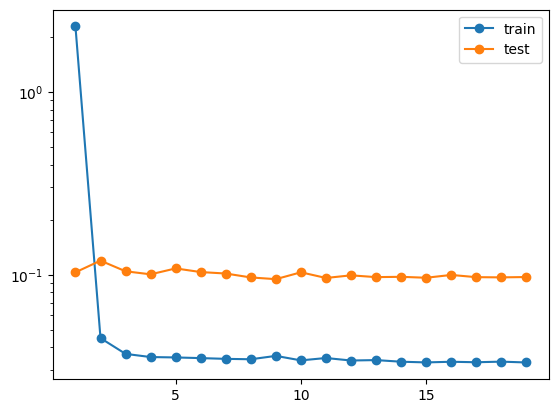

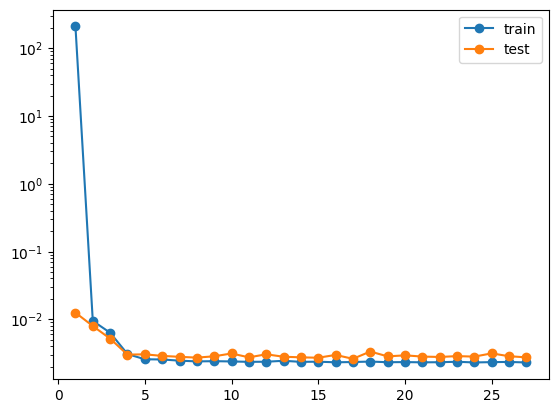

In [26]:
test(get_h3_net_1, d.l1_loss, train_set1, test_set1, params1, "n1_l1.png")
test(get_h3_net_2, d.l1_loss, train_set1, test_set1, params1, "n2_l1.png")
test(get_h3_net_3, d.l1_loss, train_set1, test_set1, params1, "n3_l1.png")
test(get_h3_net_4, d.l1_loss, train_set1, test_set1, params1, "n4_l1.png")
test(get_h3_net_5, d.l1_loss, train_set1, test_set1, params1, "n5_l1.png")

test(get_h3_net_1, d.l2_loss, train_set1, test_set1, params1, "n1_l2.png")
test(get_h3_net_2, d.l2_loss, train_set1, test_set1, params1, "n2_l2.png")
test(get_h3_net_3, d.l2_loss, train_set1, test_set1, params1, "n3_l2.png")
test(get_h3_net_4, d.l2_loss, train_set1, test_set1, params1, "n4_l2.png")
test(get_h3_net_5, d.l2_loss, train_set1, test_set1, params1, "n5_l2.png")

## H4 - cross-entropy and hinge will not differ in terms of convergence

### Networks

In [15]:
def get_h4_net_1(loss):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 499, d.relu, rng, 0.8)
    output = nn.FullConnectLayer(output, 499, d.relu, rng, 0.7)
    output = nn.FullConnectLayer(output, 350, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 250, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 100, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 40, d.relu, rng, 0.5)
    output = nn.FullConnectLayer(output, 2, d.relu, rng, 1)
    output = nn.FullConnectLayer(output, 2, d.softmax, rng, 1)

    return nn.NeuralNetwork(output, loss, rng)

def get_h4_net_2(loss):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 499, d.sigmoid, rng, 0.8)
    output = nn.FullConnectLayer(output, 499, d.sigmoid, rng, 0.7)
    output = nn.FullConnectLayer(output, 350, d.sigmoid, rng, 0.6)
    output = nn.FullConnectLayer(output, 250, d.sigmoid, rng, 0.6)
    output = nn.FullConnectLayer(output, 100, d.sigmoid, rng, 0.6)
    output = nn.FullConnectLayer(output, 40, d.sigmoid, rng, 0.5)
    output = nn.FullConnectLayer(output, 2, d.sigmoid, rng, 1)
    output = nn.FullConnectLayer(output, 2, d.softmax, rng, 1)

    return nn.NeuralNetwork(output, loss, rng)

def get_h4_net_3(loss):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])
    days = nn.FullConnectLayer(days, 360, d.relu, rng, 0.8)
    days = nn.FullConnectLayer(days, 200, d.relu, rng, 0.8)

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 200, d.relu, rng, 0.8)
    output = nn.FullConnectLayer(output, 100, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 40, d.relu, rng, 0.5)
    output = nn.FullConnectLayer(output, 2, d.relu, rng, 1)
    output = nn.FullConnectLayer(output, 2, d.softmax, rng, 1)

    return nn.NeuralNetwork(output, loss, rng)

def get_h4_net_4(loss):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])
    days = nn.FullConnectLayer(days, 360, d.sigmoid, rng, 0.8)
    days = nn.FullConnectLayer(days, 200, d.sigmoid, rng, 0.8)

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 200, d.sigmoid, rng, 0.8)
    output = nn.FullConnectLayer(output, 100, d.sigmoid, rng, 0.6)
    output = nn.FullConnectLayer(output, 40, d.sigmoid, rng, 0.5)
    output = nn.FullConnectLayer(output, 2, d.sigmoid, rng, 1)
    output = nn.FullConnectLayer(output, 2, d.softmax, rng, 1)

    return nn.NeuralNetwork(output, loss, rng)

### Tests

In [ ]:
#### Results

In [18]:
def test(function, loss, train_set, test_set, params, figname):
    print("================================== new test ==================================")
    net = function(loss)

    start = time.time()
    (train_losses, test_losses) = net.train(train_set, test_set, 1024, "output_wind")
    end = time.time()

    print(f"Time elapsed: {end - start : .2f} s")
    
    predicted = net.predict(train_set)[0, :]
    expected = train_set["output_wind"][0, :]
    auc = tf.keras.metrics.AUC()
    auc.update_state(expected, predicted)
    predicted = np.rint(predicted)
    print(f"[train] Good predictions: {np.count_nonzero(predicted == expected)}, bad predictions: {np.count_nonzero(predicted != expected)}, success_rate: {np.count_nonzero(predicted == expected) / predicted.size * 100 : .2f}%")
    print(f"[train] AUC: {auc.result().numpy()}")

    predicted = net.predict(test_set)[0, :]
    expected = test_set["output_wind"][0, :]
    auc = tf.keras.metrics.AUC()
    auc.update_state(expected, predicted)
    predicted = np.rint(predicted)
    print(f"[test] Good predictions: {np.count_nonzero(predicted == expected)}, bad predictions: {np.count_nonzero(predicted != expected)}, success_rate: {np.count_nonzero(predicted == expected) / predicted.size * 100 : .2f}%")
    print(f"[test] AUC: {auc.result().numpy()}")

    fig = plt.figure()
    ax = fig.gca()
    ax.plot(range(1, len(train_losses) + 1), train_losses, "-o")
    ax.plot(range(1, len(test_losses) + 1), test_losses, "-o")
    ax.xaxis.set_label("epoch")
    ax.xaxis.get_major_locator().set_params(integer=True)
    ax.yaxis.set_label("loss")
    ax.set_yscale("log")
    ax.legend(["train", "test"])
    fig.savefig(os.path.join("plots", "h4", figname))

================================== new test ==================================
Epoch 1: train: 0.5594759544538822, test: 0.7282086205130367
Epoch 2: train: 0.5392349790351287, test: 0.6674234280606872
Epoch 3: train: 0.5198620984446701, test: 0.671193833306379
Epoch 4: train: 0.5173058959681814, test: 0.6622083441534411
Epoch 5: train: 0.5164638941329285, test: 0.676970737973005
Epoch 6: train: 0.5154925561587447, test: 0.6594465901398887
Epoch 7: train: 0.516563671233175, test: 0.7050601672452788
Epoch 8: train: 0.5165909514936354, test: 0.6442630011227354
Epoch 9: train: 0.5152406441875201, test: 0.6787789225313329
Epoch 10: train: 0.5141924201120658, test: 0.6497157875182165
Epoch 11: train: 0.5133718878608312, test: 0.664142326931778
Epoch 12: train: 0.5128481752306246, test: 0.671430415549987
Epoch 13: train: 0.5127709057828624, test: 0.6555310508375376
Epoch 14: train: 0.5125733308320838, test: 0.6613981125724631
Epoch 15: train: 0.5121338446909098, test: 0.6606620682555076
Epoch

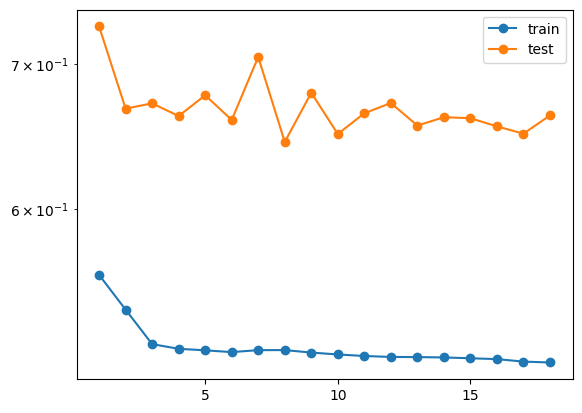

In [19]:
# test(get_h4_net_1, d.cross_entropy_loss, train_set1, test_set1, params1, "n1_cross_entropy.png")
# test(get_h4_net_2, d.cross_entropy_loss, train_set1, test_set1, params1, "n2_cross_entropy.png")
# test(get_h4_net_3, d.cross_entropy_loss, train_set1, test_set1, params1, "n3_cross_entropy.png")
test(get_h4_net_4, d.cross_entropy_loss, train_set1, test_set1, params1, "n4_cross_entropy.png")

# test(get_h4_net_1, d.hinge_loss, train_set1, test_set1, params1, "n1_hinge.png")
# test(get_h4_net_2, d.hinge_loss, train_set1, test_set1, params1, "n2_hinge.png")
# test(get_h4_net_3, d.hinge_loss, train_set1, test_set1, params1, "n3_hinge.png")
# test(get_h4_net_4, d.hinge_loss, train_set1, test_set1, params1, "n4_hinge.png")

#### Test results

## H5 - the more shared weights in network, the smaller difference between accuracy on train and test set

### Networks

In [13]:
def get_h5_net_1(is_regression):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d1 = nn.FullConnectLayer(d1, 120, d.relu, rng, 0.8)
    d2 = nn.InputLayer(120, "d2")
    d2 = nn.FullConnectLayer(d2, 120, d.relu, rng, 0.8)
    d3 = nn.InputLayer(120, "d3")
    d3 = nn.FullConnectLayer(d3, 120, d.relu, rng, 0.8)
    days = nn.MergeLayer([d1, d2, d3])

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 499, d.relu, rng, 0.8)
    output = nn.FullConnectLayer(output, 499, d.relu, rng, 0.7)
    output = nn.FullConnectLayer(output, 350, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 250, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 100, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 40, d.relu, rng, 0.5)

    if is_regression:
        output = nn.FullConnectLayer(output, 1, d.linear, rng, 1)
        return nn.NeuralNetwork(output, d.l2_loss, rng)
    else:
        output = nn.FullConnectLayer(output, 2, d.sigmoid, rng, 1)
        output = nn.FullConnectLayer(output, 2, d.softmax, rng, 1)
        return nn.NeuralNetwork(output, d.hinge_loss, rng)
        

def get_h5_net_2(is_regression):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d1 = nn.FullConnectLayer(d1, 120, d.relu, rng, 0.8)
    d2 = nn.InputLayer(120, "d2")
    d2 = nn.FullConnectLayer(d2, 120, d.relu, rng, 0.8, d1)
    d3 = nn.InputLayer(120, "d3")
    d3 = nn.FullConnectLayer(d3, 120, d.relu, rng, 0.8, d1)
    days = nn.MergeLayer([d1, d2, d3])

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 499, d.relu, rng, 0.8)
    output = nn.FullConnectLayer(output, 499, d.relu, rng, 0.7)
    output = nn.FullConnectLayer(output, 350, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 250, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 100, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 40, d.relu, rng, 0.5)

    if is_regression:
        output = nn.FullConnectLayer(output, 1, d.linear, rng, 1)
        return nn.NeuralNetwork(output, d.l2_loss, rng)
    else:
        output = nn.FullConnectLayer(output, 2, d.sigmoid, rng, 1)
        output = nn.FullConnectLayer(output, 2, d.softmax, rng, 1)
        return nn.NeuralNetwork(output, d.hinge_loss, rng)


def get_h5_net_3(is_regression):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d1 = nn.FullConnectLayer(d1, 120, d.relu, rng, 0.8)
    d2 = nn.InputLayer(120, "d2")
    d2 = nn.FullConnectLayer(d2, 120, d.relu, rng, 0.8, d1)
    d3 = nn.InputLayer(120, "d3")
    d3 = nn.FullConnectLayer(d3, 120, d.relu, rng, 0.8, d1)
    days = nn.MergeLayer([d1, d2, d3])
    days = nn.FullConnectLayer(days, 360, d.relu, rng, 0.7)

    d1_n1 = nn.InputLayer(120, "d1_n1")
    d1_n1 = nn.FullConnectLayer(d1_n1, 120, d.relu, rng, 0.8, d1)
    d2_n1 = nn.InputLayer(120, "d2_n1")
    d2_n1 = nn.FullConnectLayer(d2_n1, 120, d.relu, rng, 0.8, d2)
    d3_n1 = nn.InputLayer(120, "d3_n1")
    d3_n1 = nn.FullConnectLayer(d3_n1, 120, d.relu, rng, 0.8, d3)
    days_n1 = nn.MergeLayer([d1_n1, d2_n1, d3_n1])
    days_n1 = nn.FullConnectLayer(days_n1, 360, d.relu, rng, 0.7, days)

    d1_n2 = nn.InputLayer(120, "d1_n2")
    d1_n2 = nn.FullConnectLayer(d1_n2, 120, d.relu, rng, 0.8, d1)
    d2_n2 = nn.InputLayer(120, "d2_n2")
    d2_n2 = nn.FullConnectLayer(d2_n2, 120, d.relu, rng, 0.8, d2)
    d3_n2 = nn.InputLayer(120, "d3_n2")
    d3_n2 = nn.FullConnectLayer(d3_n2, 120, d.relu, rng, 0.8, d3)
    days_n2 = nn.MergeLayer([d1_n2, d2_n2, d3_n2])
    days_n2 = nn.FullConnectLayer(days_n2, 360, d.relu, rng, 0.7, days)

    d1_n3 = nn.InputLayer(120, "d1_n3")
    d1_n3 = nn.FullConnectLayer(d1_n3, 120, d.relu, rng, 0.8, d1)
    d2_n3 = nn.InputLayer(120, "d2_n3")
    d2_n3 = nn.FullConnectLayer(d2_n3, 120, d.relu, rng, 0.8, d2)
    d3_n3 = nn.InputLayer(120, "d3_n3")
    d3_n3 = nn.FullConnectLayer(d3_n3, 120, d.relu, rng, 0.8, d3)
    days_n3 = nn.MergeLayer([d1_n3, d2_n3, d3_n3])
    days_n3 = nn.FullConnectLayer(days_n3, 360, d.relu, rng, 0.7, days)

    days = nn.MergeLayer([days, days_n1, days_n2, days_n3])

    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([coords, city_one_hot])
    city = nn.FullConnectLayer(city, 38, d.relu, rng, 0.8)

    coords_n1 = nn.InputLayer(2, "coords_n1")
    city_one_hot_n1 = nn.InputLayer(36, "city_one_hot_n1")
    city_n1 = nn.MergeLayer([coords, city_one_hot])
    city_n1 = nn.FullConnectLayer(city_n1, 38, d.relu, rng, 0.8, city)

    coords_n2 = nn.InputLayer(2, "coords_n2")
    city_one_hot_n2 = nn.InputLayer(36, "city_one_hot_n2")
    city_n2 = nn.MergeLayer([coords, city_one_hot])
    city_n2 = nn.FullConnectLayer(city_n2, 38, d.relu, rng, 0.8, city)

    coords_n3 = nn.InputLayer(2, "coords_n3")
    city_one_hot_n3 = nn.InputLayer(36, "city_one_hot_n3")
    city_n3 = nn.MergeLayer([coords, city_one_hot])
    city_n3 = nn.FullConnectLayer(city_n3, 38, d.relu, rng, 0.8, city)

    cities = nn.MergeLayer([city, city_n1, city_n2, city_n3])
    
    date = nn.InputLayer(1, "date")

    output = nn.MergeLayer([days, cities, date])
    output = nn.FullConnectLayer(output, 1500, d.relu, rng, 0.7)
    output = nn.FullConnectLayer(output, 1000, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 600, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 200, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 100, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 50, d.relu, rng, 0.6)

    if is_regression:
        output = nn.FullConnectLayer(output, 1, d.linear, rng, 1)
        return nn.NeuralNetwork(output, d.l2_loss, rng)
    else:
        output = nn.FullConnectLayer(output, 2, d.sigmoid, rng, 1)
        output = nn.FullConnectLayer(output, 2, d.softmax, rng, 1)
        return nn.NeuralNetwork(output, d.hinge_loss, rng)

### Tests

#### Results

In [7]:
def test(function, output, train_set, test_set, params, figname):
    print("================================== new test ==================================")
    net = function(output == "output_temp")

    start = time.time()
    (train_losses, test_losses) = net.train(train_set, test_set, 1024, output)
    end = time.time()

    print(f"Time elapsed: {end - start : .2f} s")

    if output == "output_temp":
        predicted = denormalized(net.predict(train_set), params["temperature"])
        expected = denormalized(train_set[output], params["temperature"])
        diffs = np.abs(predicted - expected)
        print(f"[train] min: {np.min(diffs)}, max: {np.max(diffs)}, mean: {np.mean(diffs)}, median: {np.median(diffs)}")
        print(f"[train] Good predictions: {np.count_nonzero(diffs <= 2)}, bad predictions: {np.count_nonzero(diffs > 2)}, success rate: {np.count_nonzero(diffs <= 2) / diffs.size * 100 : .2f}%")

        predicted = denormalized(net.predict(test_set), params["temperature"])
        expected = denormalized(test_set[output], params["temperature"])
        diffs = np.abs(predicted - expected)
        print(f"[test] min: {np.min(diffs)}, max: {np.max(diffs)}, mean: {np.mean(diffs)}, median: {np.median(diffs)}")
        print(f"[test] Good predictions: {np.count_nonzero(diffs <= 2)}, bad predictions: {np.count_nonzero(diffs > 2)}, success rate: {np.count_nonzero(diffs <= 2) / diffs.size * 100 : .2f}%")
    else:
        predicted = net.predict(train_set)[0, :]
        expected = train_set["output_wind"][0, :]
        auc = tf.keras.metrics.AUC()
        auc.update_state(expected, predicted)
        predicted = np.rint(predicted)
        print(f"[train] Good predictions: {np.count_nonzero(predicted == expected)}, bad predictions: {np.count_nonzero(predicted != expected)}, success_rate: {np.count_nonzero(predicted == expected) / predicted.size * 100 : .2f}%")
        print(f"[train] AUC: {auc.result().numpy()}")

        predicted = net.predict(test_set)[0, :]
        expected = test_set["output_wind"][0, :]
        auc = tf.keras.metrics.AUC()
        auc.update_state(expected, predicted)
        predicted = np.rint(predicted)
        print(f"[test] Good predictions: {np.count_nonzero(predicted == expected)}, bad predictions: {np.count_nonzero(predicted != expected)}, success_rate: {np.count_nonzero(predicted == expected) / predicted.size * 100 : .2f}%")
        print(f"[test] AUC: {auc.result().numpy()}")

    fig = plt.figure()
    ax = fig.gca()
    ax.plot(range(1, len(train_losses) + 1), train_losses, "-o")
    ax.plot(range(1, len(test_losses) + 1), test_losses, "-o")
    ax.xaxis.set_label("epoch")
    ax.xaxis.get_major_locator().set_params(integer=True)
    ax.yaxis.set_label("loss")
    ax.set_yscale("log")
    ax.legend(["train", "test"])
    display(fig)

================================== new test ==================================
Epoch 1: train: 0.10280022574297289, test: 0.016014277872107966
Epoch 2: train: 0.01465763521468438, test: 0.014286901247898515
Epoch 3: train: 0.014465844248435732, test: 0.014287970980140436
Epoch 4: train: 0.0144409403971628, test: 0.014290050294944057
Epoch 5: train: 0.014449816590251739, test: 0.014287003247641317
Time elapsed:  55.07 s
[train] min: 5.838773432742528e-05, max: 40.66771256726204, mean: 7.549699076902947, median: 6.558787446059341
[train] Good predictions: 7331, bad predictions: 38352, success rate:  16.05%
[test] min: 0.0009416852014396682, max: 40.316989967549205, mean: 7.628470187989284, median: 6.766358375183074
[test] Good predictions: 1917, bad predictions: 10494, success rate:  15.45%


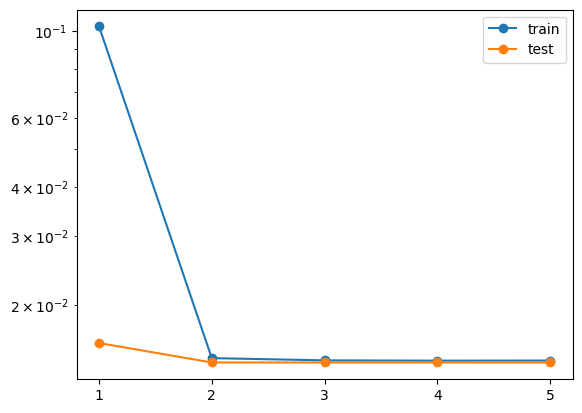

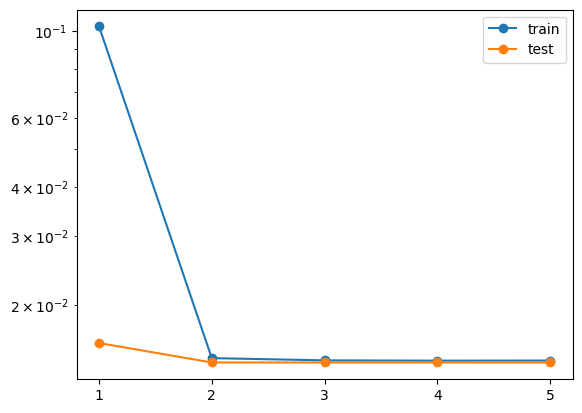

In [14]:
test(get_h5_net_11, "output_temp", train_set1, test_set1, params1, "n1_r.png")
# test(get_h5_net_2, "output_temp", train_set1, test_set1, params1, "n2_r.png")
# test(get_h5_net_3, "output_temp", train_set2, test_set2, params2, "n3_r.png")

# test(get_h5_net_1, "output_wind", train_set1, test_set1, params1, "n1_c.png")
# test(get_h5_net_2, "output_wind", train_set1, test_set1, params1, "n2_c.png")
# test(get_h5_net_3, "output_wind", train_set2, test_set2, params2, "n3_c.png")

## H6 - classification will have better accuracy using ReLUs, while regression will have better accuracy using sigmoids

### Networks

In [3]:
def get_h6_net_1(activation):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 499, activation, rng, 0.8)
    output = nn.FullConnectLayer(output, 499, activation, rng, 0.7)
    output = nn.FullConnectLayer(output, 350, activation, rng, 0.6)
    output = nn.FullConnectLayer(output, 250, activation, rng, 0.6)
    output = nn.FullConnectLayer(output, 100, activation, rng, 0.6)
    output = nn.FullConnectLayer(output, 40, activation, rng, 0.5)
    output = nn.FullConnectLayer(output, 1, d.linear, rng, 1)

    return nn.NeuralNetwork(output, d.l2_loss, rng)


def get_h6_net_2(activation):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 499, activation, rng, 0.8)
    output = nn.FullConnectLayer(output, 499, activation, rng, 0.7)
    output = nn.FullConnectLayer(output, 350, activation, rng, 0.6)
    output = nn.FullConnectLayer(output, 250, activation, rng, 0.6)
    output = nn.FullConnectLayer(output, 100, activation, rng, 0.6)
    output = nn.FullConnectLayer(output, 40, activation, rng, 0.5)
    output = nn.FullConnectLayer(output, 2, d.sigmoid, rng, 1)
    output = nn.FullConnectLayer(output, 2, d.softmax, rng, 1)

    return nn.NeuralNetwork(output, d.hinge_loss, rng)

### Tests

#### Results

In [ ]:
def test(function, output, activation, train_set, test_set, params, figname):
    print("================================== new test ==================================")
    net = function(activation)

    start = time.time()
    (train_losses, test_losses) = net.train(train_set, test_set, 1024, output)
    end = time.time()

    print(f"Time elapsed: {end - start : .2f} s")

    if output == "output_temp":
        predicted = denormalized(net.predict(train_set), params["temperature"])
        expected = denormalized(train_set[output], params["temperature"])
        diffs = np.abs(predicted - expected)
        print(f"[train] min: {np.min(diffs)}, max: {np.max(diffs)}, mean: {np.mean(diffs)}, median: {np.median(diffs)}")
        print(f"[train] Good predictions: {np.count_nonzero(diffs <= 2)}, bad predictions: {np.count_nonzero(diffs > 2)}, success rate: {np.count_nonzero(diffs <= 2) / diffs.size * 100 : .2f}%")

        predicted = denormalized(net.predict(test_set), params["temperature"])
        expected = denormalized(test_set[output], params["temperature"])
        diffs = np.abs(predicted - expected)
        print(f"[test] min: {np.min(diffs)}, max: {np.max(diffs)}, mean: {np.mean(diffs)}, median: {np.median(diffs)}")
        print(f"[test] Good predictions: {np.count_nonzero(diffs <= 2)}, bad predictions: {np.count_nonzero(diffs > 2)}, success rate: {np.count_nonzero(diffs <= 2) / diffs.size * 100 : .2f}%")
    else:
        predicted = net.predict(train_set)[0, :]
        expected = train_set["output_wind"][0, :]
        auc = tf.keras.metrics.AUC()
        auc.update_state(expected, predicted)
        predicted = np.rint(predicted)
        print(f"[train] Good predictions: {np.count_nonzero(predicted == expected)}, bad predictions: {np.count_nonzero(predicted != expected)}, success_rate: {np.count_nonzero(predicted == expected) / predicted.size * 100 : .2f}%")
        print(f"[train] AUC: {auc.result().numpy()}")

        predicted = net.predict(test_set)[0, :]
        expected = test_set["output_wind"][0, :]
        auc = tf.keras.metrics.AUC()
        auc.update_state(expected, predicted)
        predicted = np.rint(predicted)
        print(f"[test] Good predictions: {np.count_nonzero(predicted == expected)}, bad predictions: {np.count_nonzero(predicted != expected)}, success_rate: {np.count_nonzero(predicted == expected) / predicted.size * 100 : .2f}%")
        print(f"[test] AUC: {auc.result().numpy()}")

    fig = plt.figure()
    ax = fig.gca()
    ax.plot(range(1, len(train_losses) + 1), train_losses, "-o")
    ax.plot(range(1, len(test_losses) + 1), test_losses, "-o")
    ax.xaxis.set_label("epoch")
    ax.xaxis.get_major_locator().set_params(integer=True)
    ax.yaxis.set_label("loss")
    ax.set_yscale("log")
    ax.legend(["train", "test"])
    fig.savefig(os.path.join("plots", "h6", figname))

In [ ]:
test(get_h6_net_1, "output_temp", d.relu, train_set1, test_set1, params1, "n1_r_relu.png")
test(get_h6_net_1, "output_temp", d.sigmoid, train_set1, test_set1, params1, "n1_r_sigmoid.png")
test(get_h6_net_2, "output_wind", d.relu, train_set1, test_set1, params1, "n2_c_relu.png")
test(get_h6_net_2, "output_wind", d.sigmoid, train_set1, test_set1, params1, "n2_c_sigmoid.png")

## H7 - aggregation will grant similar results with less computations needed

### Networks

In [ ]:
def get_h7_net_1(is_regression):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 499, d.relu, rng, 0.8)
    output = nn.FullConnectLayer(output, 499, d.relu, rng, 0.7)
    output = nn.FullConnectLayer(output, 350, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 250, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 100, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 40, d.relu, rng, 0.5)

    if is_regression:
        output = nn.FullConnectLayer(output, 1, d.linear, rng, 1)
        return nn.NeuralNetwork(output, d.l2_loss, rng)
    else:
        output = nn.FullConnectLayer(output, 2, d.sigmoid, rng, 1)
        output = nn.FullConnectLayer(output, 2, d.softmax, rng, 1)
        return nn.NeuralNetwork(output, d.hinge_loss, rng)


def get_h7_net_2(is_regression):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(40, "d1")
    d2 = nn.InputLayer(40, "d2")
    d3 = nn.InputLayer(40, "d3")
    days = nn.MergeLayer([d1, d2, d3])
    days = nn.FullConnectLayer(days, 360, d.relu, rng, 0.8)
    days = nn.FullConnectLayer(days, 200, d.relu, rng, 0.8)

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 200, d.relu, rng, 0.8)
    output = nn.FullConnectLayer(output, 100, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 40, d.relu, rng, 0.5)

    if is_regression:
        output = nn.FullConnectLayer(output, 1, d.linear, rng, 1)
        return nn.NeuralNetwork(output, d.l2_loss, rng)
    else:
        output = nn.FullConnectLayer(output, 2, d.sigmoid, rng, 1)
        output = nn.FullConnectLayer(output, 2, d.softmax, rng, 1)
        return nn.NeuralNetwork(output, d.hinge_loss, rng)


def get_h7_net_3(is_regression):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(40, "d1")
    d2 = nn.InputLayer(40, "d2")
    d3 = nn.InputLayer(40, "d3")
    days = nn.MergeLayer([d1, d2, d3])
    days = nn.FullConnectLayer(days, 120, d.relu, rng, 0.8)
    days = nn.FullConnectLayer(days, 100, d.relu, rng, 0.8)

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 100, d.relu, rng, 0.8)
    output = nn.FullConnectLayer(output, 40, d.relu, rng, 0.5)

    if is_regression:
        output = nn.FullConnectLayer(output, 1, d.linear, rng, 1)
        return nn.NeuralNetwork(output, d.l2_loss, rng)
    else:
        output = nn.FullConnectLayer(output, 2, d.sigmoid, rng, 1)
        output = nn.FullConnectLayer(output, 2, d.softmax, rng, 1)
        return nn.NeuralNetwork(output, d.hinge_loss, rng)

### Tests

#### Results

In [ ]:
def test(function, output, train_set, test_set, params, figname):
    print("================================== new test ==================================")
    net = function(output == "output_temp")

    start = time.time()
    (train_losses, test_losses) = net.train(train_set, test_set, 1024, output)
    end = time.time()

    if output == "output_temp":
        print(f"Time elapsed: {end - start : .2f} s")

        predicted = denormalized(net.predict(train_set), params["temperature"])
        expected = denormalized(train_set[output], params["temperature"])
        diffs = np.abs(predicted - expected)
        print(f"[train] min: {np.min(diffs)}, max: {np.max(diffs)}, mean: {np.mean(diffs)}, median: {np.median(diffs)}")
        print(f"[train] Good predictions: {np.count_nonzero(diffs <= 2)}, bad predictions: {np.count_nonzero(diffs > 2)}, success rate: {np.count_nonzero(diffs <= 2) / diffs.size * 100 : .2f}%")

        predicted = denormalized(net.predict(test_set), params["temperature"])
        expected = denormalized(test_set[output], params["temperature"])
        diffs = np.abs(predicted - expected)
        print(f"[test] min: {np.min(diffs)}, max: {np.max(diffs)}, mean: {np.mean(diffs)}, median: {np.median(diffs)}")
        print(f"[test] Good predictions: {np.count_nonzero(diffs <= 2)}, bad predictions: {np.count_nonzero(diffs > 2)}, success rate: {np.count_nonzero(diffs <= 2) / diffs.size * 100 : .2f}%")
    else:
        predicted = net.predict(train_set)[0, :]
        expected = train_set["output_wind"][0, :]
        auc = tf.keras.metrics.AUC()
        auc.update_state(expected, predicted)
        predicted = np.rint(predicted)
        print(f"[train] Good predictions: {np.count_nonzero(predicted == expected)}, bad predictions: {np.count_nonzero(predicted != expected)}, success_rate: {np.count_nonzero(predicted == expected) / predicted.size * 100 : .2f}%")
        print(f"[train] AUC: {auc.result().numpy()}")

        predicted = net.predict(test_set)[0, :]
        expected = test_set["output_wind"][0, :]
        auc = tf.keras.metrics.AUC()
        auc.update_state(expected, predicted)
        predicted = np.rint(predicted)
        print(f"[test] Good predictions: {np.count_nonzero(predicted == expected)}, bad predictions: {np.count_nonzero(predicted != expected)}, success_rate: {np.count_nonzero(predicted == expected) / predicted.size * 100 : .2f}%")
        print(f"[test] AUC: {auc.result().numpy()}")

    fig = plt.figure()
    ax = fig.gca()
    ax.plot(range(1, len(train_losses) + 1), train_losses, "-o")
    ax.plot(range(1, len(test_losses) + 1), test_losses, "-o")
    ax.xaxis.set_label("epoch")
    ax.xaxis.get_major_locator().set_params(integer=True)
    ax.yaxis.set_label("loss")
    ax.set_yscale("log")
    ax.legend(["train", "test"])
    fig.savefig(os.path.join("plots", "h7", figname))

In [ ]:
test(get_h7_net_1, "output_temp", train_set1, test_set1, params1, "n1_r.png")
test(get_h7_net_2, "output_temp", train_set4, test_set4, params4, "n2_r.png")
test(get_h7_net_3, "output_temp", train_set4, test_set4, params4, "n3_r.png")

test(get_h7_net_1, "output_wind", train_set1, test_set1, params1, "n1_c.png")
test(get_h7_net_2, "output_wind", train_set4, test_set4, params4, "n2_c.png")
test(get_h7_net_3, "output_wind", train_set4, test_set4, params4, "n3_c.png")

## H8 - predicting middle day will grant better accuracy, but worse convergence

### Networks

In [ ]:
def get_h8_net_1(is_regression):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 400, d.relu, rng, 0.8)
    output = nn.FullConnectLayer(output, 250, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 80, d.relu, rng, 0.6)

    if is_regression:
        output = nn.FullConnectLayer(output, 1, d.linear, rng, 1)
        return nn.NeuralNetwork(output, d.l2_loss, rng)
    else:
        output = nn.FullConnectLayer(output, 2, d.sigmoid, rng, 1)
        output = nn.FullConnectLayer(output, 2, d.softmax, rng, 1)
        return nn.NeuralNetwork(output, d.hinge_loss, rng)

def get_h8_net_2(is_regression):
    rng = np.random.default_rng(1)

    d1 = nn.InputLayer(120, "d1")
    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d1, d2, d3])

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    middle = nn.MergeLayer([days, city])
    middle = nn.FullConnectLayer(middle, 400, d.relu, rng, 0.8)
    middle = nn.FullConnectLayer(middle, 250, d.relu, rng, 0.6)
    middle = nn.FullConnectLayer(middle, 80, d.relu, rng, 0.6)

    if is_regression:
        middle = nn.FullConnectLayer(middle, 1, d.linear, rng, 1)
    else:
        middle = nn.FullConnectLayer(middle, 2, d.sigmoid, rng, 1)
        middle = nn.FullConnectLayer(middle, 2, d.softmax, rng, 1)

    d2 = nn.InputLayer(120, "d2")
    d3 = nn.InputLayer(120, "d3")
    days = nn.MergeLayer([d2, d3, middle])

    date = nn.InputLayer(1, "date")
    coords = nn.InputLayer(2, "coords")
    city_one_hot = nn.InputLayer(36, "city_one_hot")
    city = nn.MergeLayer([date, coords, city_one_hot])

    output = nn.MergeLayer([days, city])
    output = nn.FullConnectLayer(output, 400, d.relu, rng, 0.8)
    output = nn.FullConnectLayer(output, 250, d.relu, rng, 0.6)
    output = nn.FullConnectLayer(output, 80, d.relu, rng, 0.6)

    if is_regression:
        output = nn.FullConnectLayer(output, 1, d.linear, rng, 1)
        return nn.NeuralNetwork(output, d.l2_loss, rng)
    else:
        output = nn.FullConnectLayer(output, 2, d.sigmoid, rng, 1)
        output = nn.FullConnectLayer(output, 2, d.softmax, rng, 1)
        return nn.NeuralNetwork(output, d.hinge_loss, rng)

### Tests

#### Results

In [ ]:
def test(function, output, train_set, test_set, params, figname):
    print("================================== new test ==================================")
    net = function(output == "output_temp")

    start = time.time()
    (train_losses, test_losses) = net.train(train_set, test_set, 1024, output)
    end = time.time()

    print(f"Time elapsed: {end - start : .2f} s")

    if output == "output_temp":
        predicted = denormalized(net.predict(train_set), params["temperature"])
        expected = denormalized(train_set[output], params["temperature"])
        diffs = np.abs(predicted - expected)
        print(f"[train] min: {np.min(diffs)}, max: {np.max(diffs)}, mean: {np.mean(diffs)}, median: {np.median(diffs)}")
        print(f"[train] Good predictions: {np.count_nonzero(diffs <= 2)}, bad predictions: {np.count_nonzero(diffs > 2)}, success rate: {np.count_nonzero(diffs <= 2) / diffs.size * 100 : .2f}%")

        predicted = denormalized(net.predict(test_set), params["temperature"])
        expected = denormalized(test_set[output], params["temperature"])
        diffs = np.abs(predicted - expected)
        print(f"[test] min: {np.min(diffs)}, max: {np.max(diffs)}, mean: {np.mean(diffs)}, median: {np.median(diffs)}")
        print(f"[test] Good predictions: {np.count_nonzero(diffs <= 2)}, bad predictions: {np.count_nonzero(diffs > 2)}, success rate: {np.count_nonzero(diffs <= 2) / diffs.size * 100 : .2f}%")
    else:
        predicted = net.predict(train_set)[0, :]
        expected = train_set["output_wind"][0, :]
        auc = tf.keras.metrics.AUC()
        auc.update_state(expected, predicted)
        predicted = np.rint(predicted)
        print(f"[train] Good predictions: {np.count_nonzero(predicted == expected)}, bad predictions: {np.count_nonzero(predicted != expected)}, success_rate: {np.count_nonzero(predicted == expected) / predicted.size * 100 : .2f}%")
        print(f"[train] AUC: {auc.result().numpy()}")

        predicted = net.predict(test_set)[0, :]
        expected = test_set["output_wind"][0, :]
        auc = tf.keras.metrics.AUC()
        auc.update_state(expected, predicted)
        predicted = np.rint(predicted)
        print(f"[test] Good predictions: {np.count_nonzero(predicted == expected)}, bad predictions: {np.count_nonzero(predicted != expected)}, success_rate: {np.count_nonzero(predicted == expected) / predicted.size * 100 : .2f}%")
        print(f"[test] AUC: {auc.result().numpy()}")

    fig = plt.figure()
    ax = fig.gca()
    ax.plot(range(1, len(train_losses) + 1), train_losses, "-o")
    ax.plot(range(1, len(test_losses) + 1), test_losses, "-o")
    ax.xaxis.set_label("epoch")
    ax.xaxis.get_major_locator().set_params(integer=True)
    ax.yaxis.set_label("loss")
    ax.set_yscale("log")
    ax.legend(["train", "test"])
    fig.savefig(os.path.join("plots", "h8", figname))

In [ ]:
test(get_h8_net_1, "output_temp", train_set1, test_set1, params1, "n1_r_no_mid_prediction.png")
test(get_h8_net_2, "output_temp", train_set1, test_set1, params1, "n2_r_no_mid_prediction.png")

test(get_h8_net_1, "output_wind", train_set1, test_set1, params1, "n1_c_no_mid_prediction.png")
test(get_h8_net_2, "output_wind", train_set1, test_set1, params1, "n2_c_no_mid_prediction.png")